In [2]:
# !sudo apt update
# !sudo apt-get update
# !sudo apt autoremove

# first run this cell to install fonts
!sudo apt install msttcorefonts

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'ttf-mscorefonts-installer' instead of 'msttcorefonts'
The following additional packages will be installed:
  cabextract libmspack0 python3-chardet python3-debconf python3-debian
  python3-distro-info python3-distupgrade python3-pkg-resources python3-six
  python3-update-manager ubuntu-release-upgrader-core update-manager-core
  update-notifier-common xfonts-encodings xfonts-utils
Suggested packages:
  python3-setuptools python3-launchpadlib
The following NEW packages will be installed:
  cabextract libmspack0 python3-chardet python3-debconf python3-debian
  python3-distro-info python3-distupgrade python3-pkg-resources python3-six
  python3-update-manager ttf-mscorefonts-installer
  ubuntu-release-upgrader-core update-manager-core update-notifier-common
  xfonts-encodings xfonts-utils
0 upgraded, 16 newly installed, 0 to remove and 39 not upgraded.
Need to get 1,332 kB of arc

In [1]:
# check the fonts you prefer in the font list
import  matplotlib.font_manager
flist = matplotlib.font_manager.get_fontconfig_fonts()
names = [matplotlib.font_manager.FontProperties(fname=fname).get_name() for fname in flist]
names

['Liberation Sans',
 'Liberation Mono',
 'Verdana',
 'Courier New',
 'Arial',
 'Comic Sans MS',
 'Trebuchet MS',
 'Verdana',
 'Georgia',
 'Courier New',
 'Verdana',
 'Comic Sans MS',
 'Liberation Sans Narrow',
 'Liberation Sans Narrow',
 'Arial',
 'Andale Mono',
 'Courier New',
 'Liberation Sans',
 'Verdana',
 'Times New Roman',
 'Andale Mono',
 'Arial Black',
 'Courier New',
 'Trebuchet MS',
 'Arial',
 'Georgia',
 'Liberation Mono',
 'Courier New',
 'Liberation Serif',
 'Georgia',
 'Arial',
 'Liberation Sans',
 'Trebuchet MS',
 'Arial',
 'Trebuchet MS',
 'Courier New',
 'Liberation Serif',
 'Trebuchet MS',
 'Liberation Sans',
 'Arial Black',
 'Times New Roman',
 'Trebuchet MS',
 'Liberation Sans Narrow',
 'Times New Roman',
 'Liberation Serif',
 'Arial',
 'Comic Sans MS',
 'Courier New',
 'Liberation Sans Narrow',
 'Times New Roman',
 'Impact',
 'Humor Sans',
 'Liberation Mono',
 'Courier New',
 'Georgia',
 'Georgia',
 'Georgia',
 'Verdana',
 'Verdana',
 'Liberation Serif',
 'Trebuche

In [2]:
!ls ~/.cache

matplotlib  node-gyp


In [3]:
!rm ~/.cache/matplotlib -rf

In [2]:
import math
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="whitegrid", font_scale=1.4)
sns.set_style({'font.family': 'Times New Roman'})

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [ ]:
def clustermap(X, label, label_fontsize, label_padding, ticks_fontsize, filename, palette_string, factor=2):

    import seaborn as sns
    sns.set(style="whitegrid", font_scale=1.4*factor)
    sns.set_style({'font.family': 'Times New Roman'})

    lut = dict(zip(label.unique(), "grb"))
    row_colors = label.map(lut)
    df_colors = pd.DataFrame(data={'Disease': row_colors[row_colors == 'r'], 'Control': row_colors[row_colors == 'g']}) 

    custom_cmap = sns.color_palette(palette_string, 21, as_cmap=True)
    g = sns.clustermap(X, cmap=custom_cmap, row_colors=df_colors, z_score=1, figsize=(10*factor, 10*factor))
    g.fig.subplots_adjust(right=0.9)
    g.ax_cbar.set_position((0.7, .2, .03, .4), 'horizontal')

    g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), fontsize=ticks_fontsize*factor)
    g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(), fontsize=ticks_fontsize*factor, rotation=0)
    g.ax_heatmap.set_xlabel('Metabolites', fontsize=label_fontsize*factor, labelpad=label_padding*factor)
    g.ax_heatmap.set_ylabel('Patient', fontsize=label_fontsize*factor, labelpad=label_padding*factor)

    plt.savefig(filename, bbox_inches='tight', pad_inches=0)
    plt.show()

def feature_importance_plot(X, y, label_fontsize, label_padding, ticks_fontsize, filename, palette_string, factor=4):
    model = RandomForestClassifier(n_estimators=17, random_state=0)
    model.fit(X, y)

    plt.figure(figsize=(8*factor, 8*factor))

    bar_chart_data = pd.Series(data=model.feature_importances_).sort_values(ascending=False).to_frame()
    bar_chart_data.columns = ['Feature Importance']
    bar_chart_data['Metabolites'] = pd.Series(data=model.feature_importances_, index=X.columns).sort_values(ascending=False).index

    color_palette = sns.color_palette(palette_string, X.shape[1]+3)
    color_palette.reverse()

    b_plot = sns.barplot(x="Feature Importance", y="Metabolites", data=bar_chart_data, palette=color_palette)
    b_plot.set_xlabel("Feature Importance", fontsize=label_fontsize*factor, labelpad=label_padding*factor)
    b_plot.set_ylabel("Metabolites", fontsize=label_fontsize*factor, labelpad=label_padding*factor)
    b_plot.tick_params(labelsize=ticks_fontsize*factor)

    sns.despine(left=True, bottom=True)
    plt.savefig(filename, bbox_inches='tight', pad_inches=0)
    plt.show()

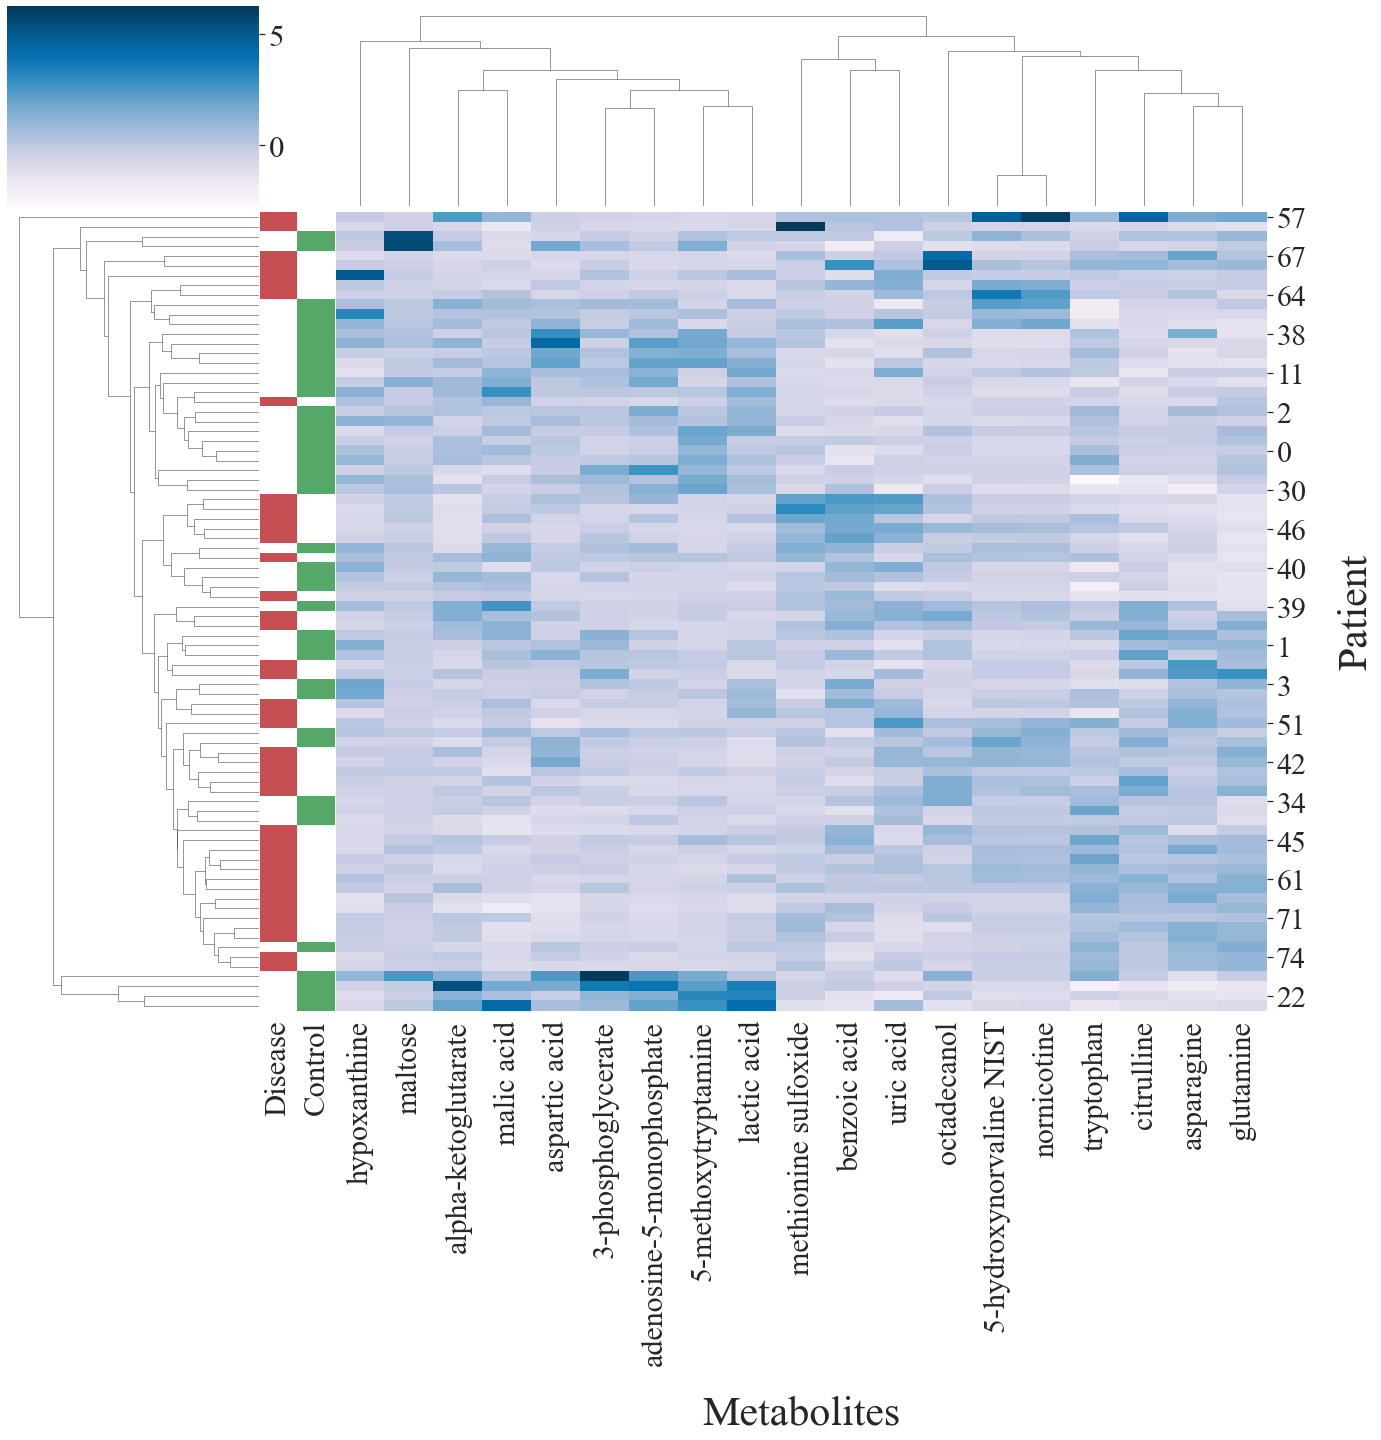

In [ ]:
plasma = pd.read_csv('plasma(Specific Metabolics)_rfecv19.csv')

X = plasma.iloc[:, :-1]
label = plasma["Class"]
y = label.map({"control": 1, "disease": 0})

clustermap(X, label, 21, 15, 15, 'cm_plasma.jpg', 'PuBu')

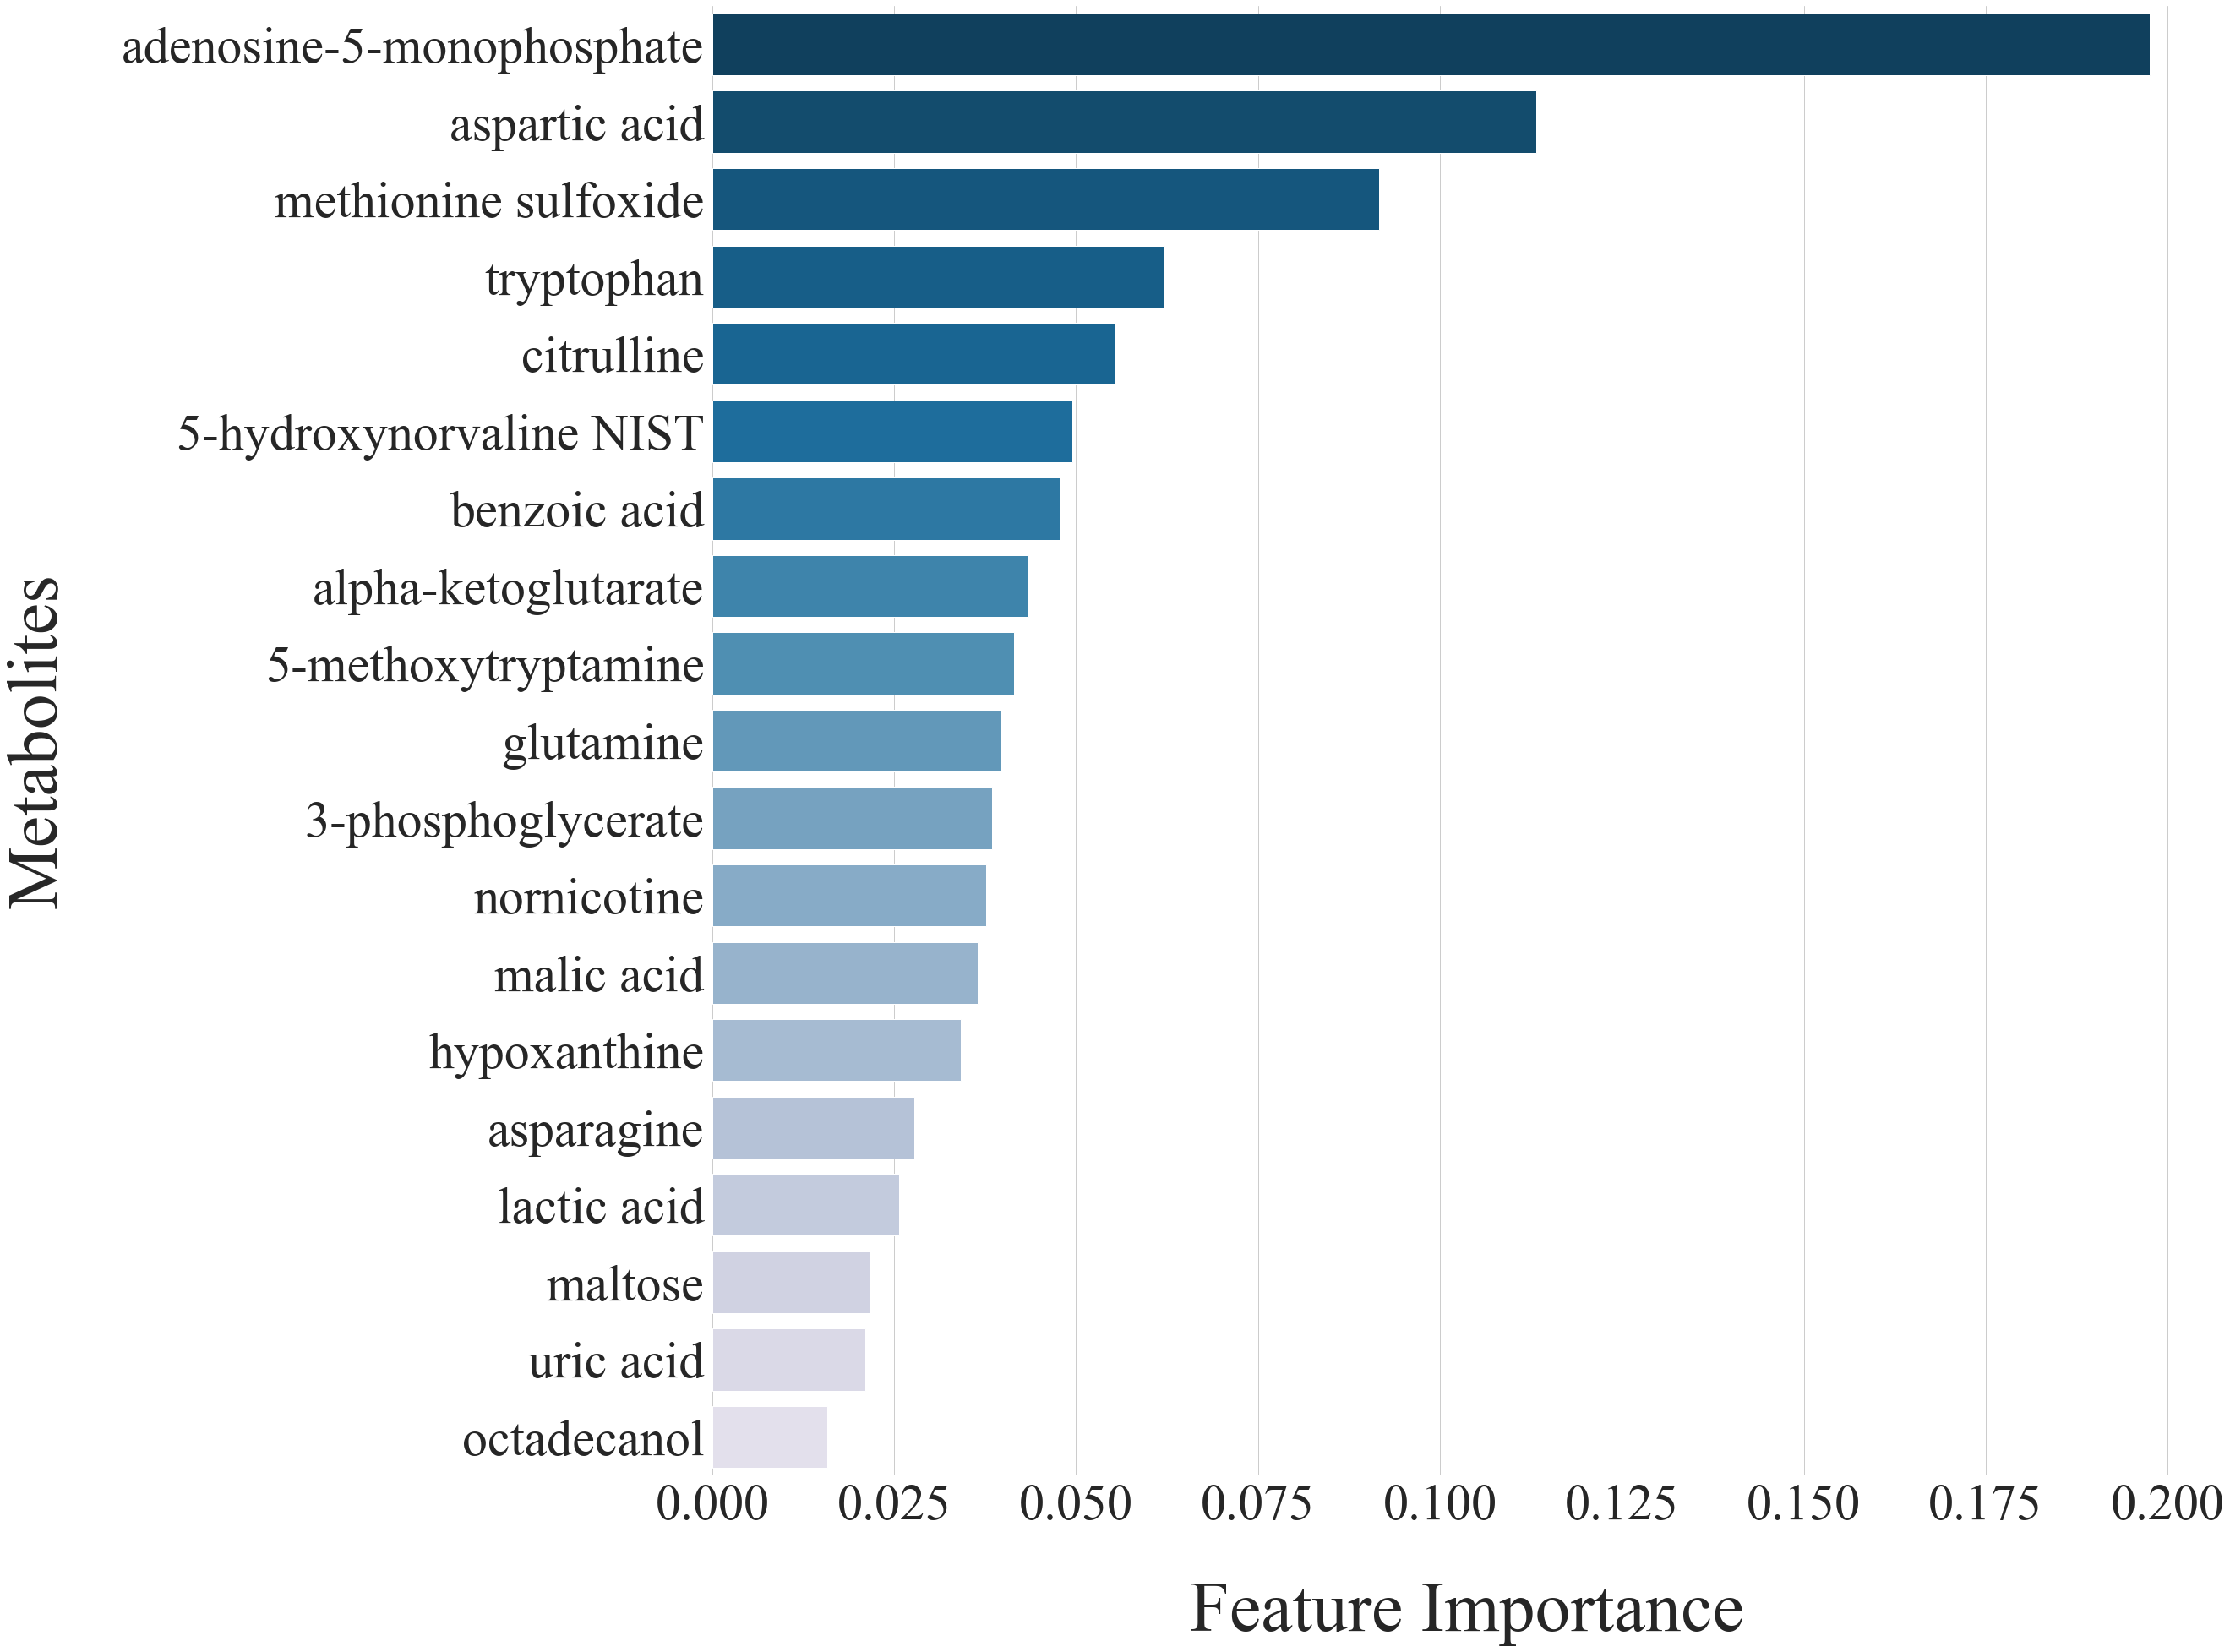

In [ ]:
feature_importance_plot(X, y, 21, 15, 15, 'fip_plasma.jpg', 'PuBu')

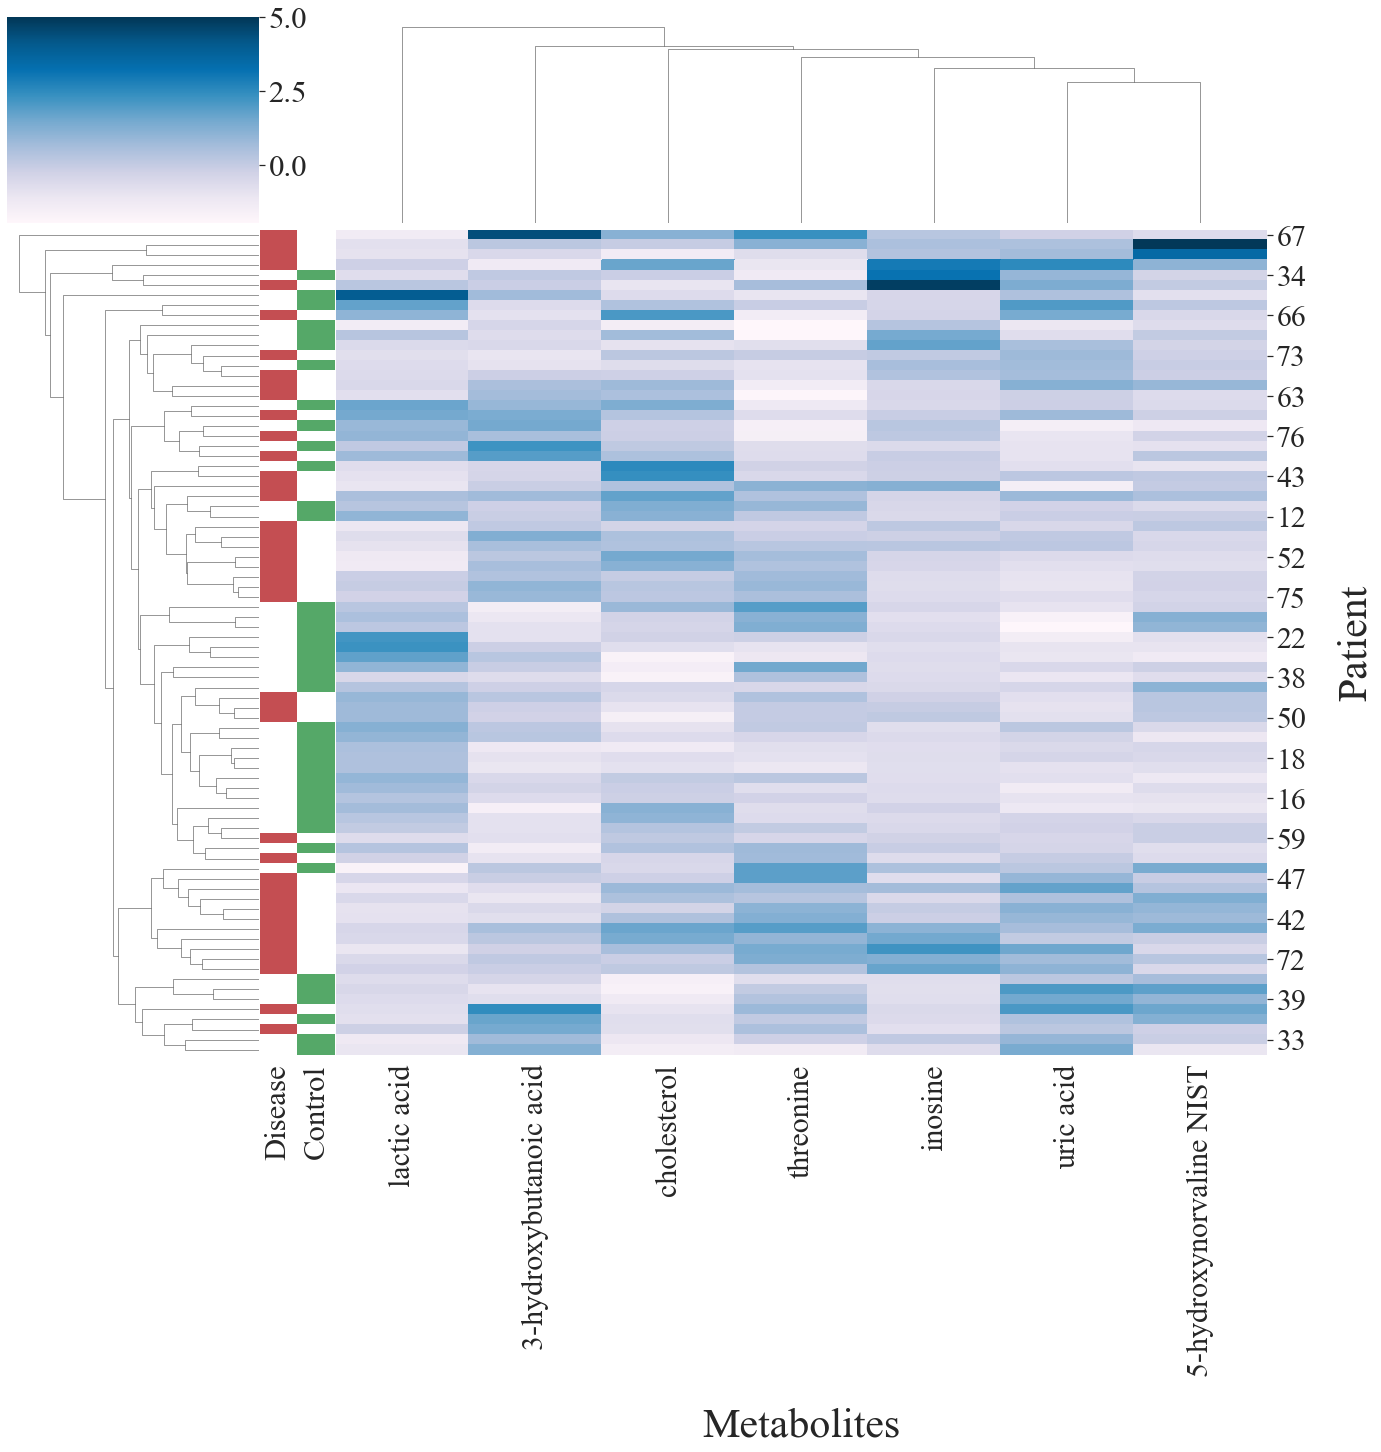

In [ ]:
serum = pd.read_csv('serum(Specific Metabolics)_rfecv7.csv')
X = serum.iloc[:, :-1]

clustermap(X, label, 21, 15, 15, 'cm_serum.jpg', 'PuBu')

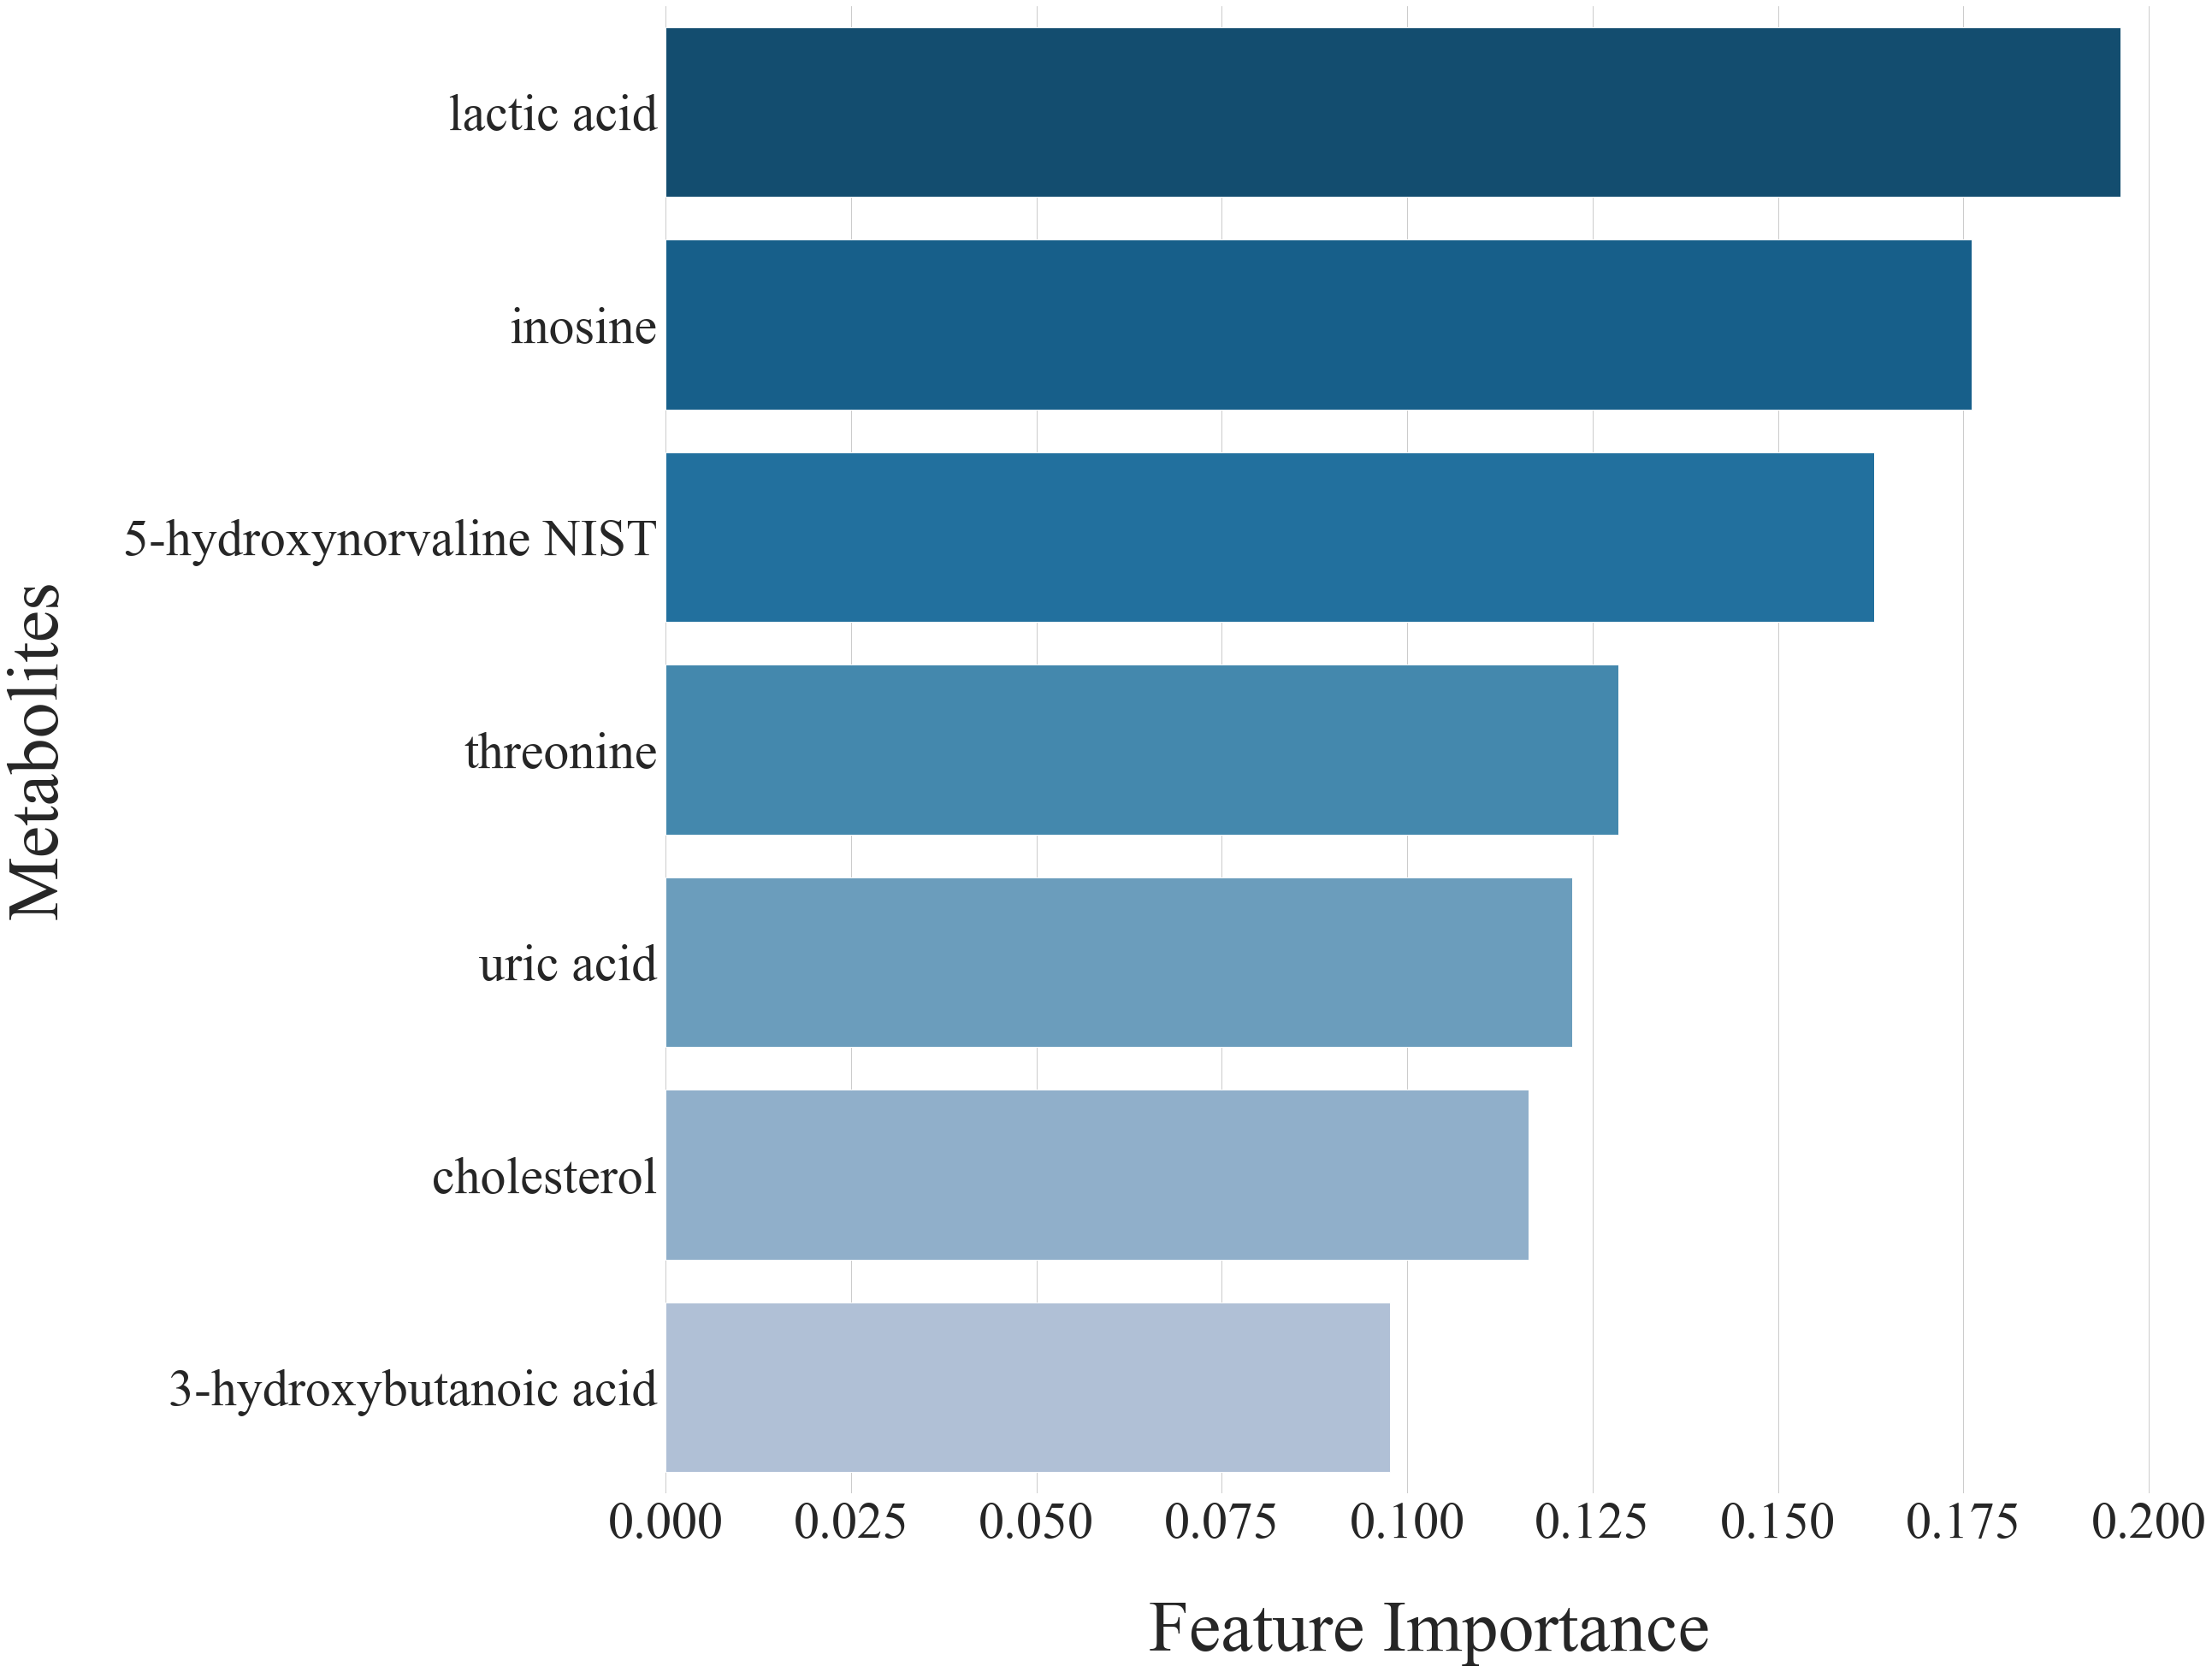

In [ ]:
feature_importance_plot(X, y, 21, 15, 15, 'fip_serum.jpg', 'PuBu')

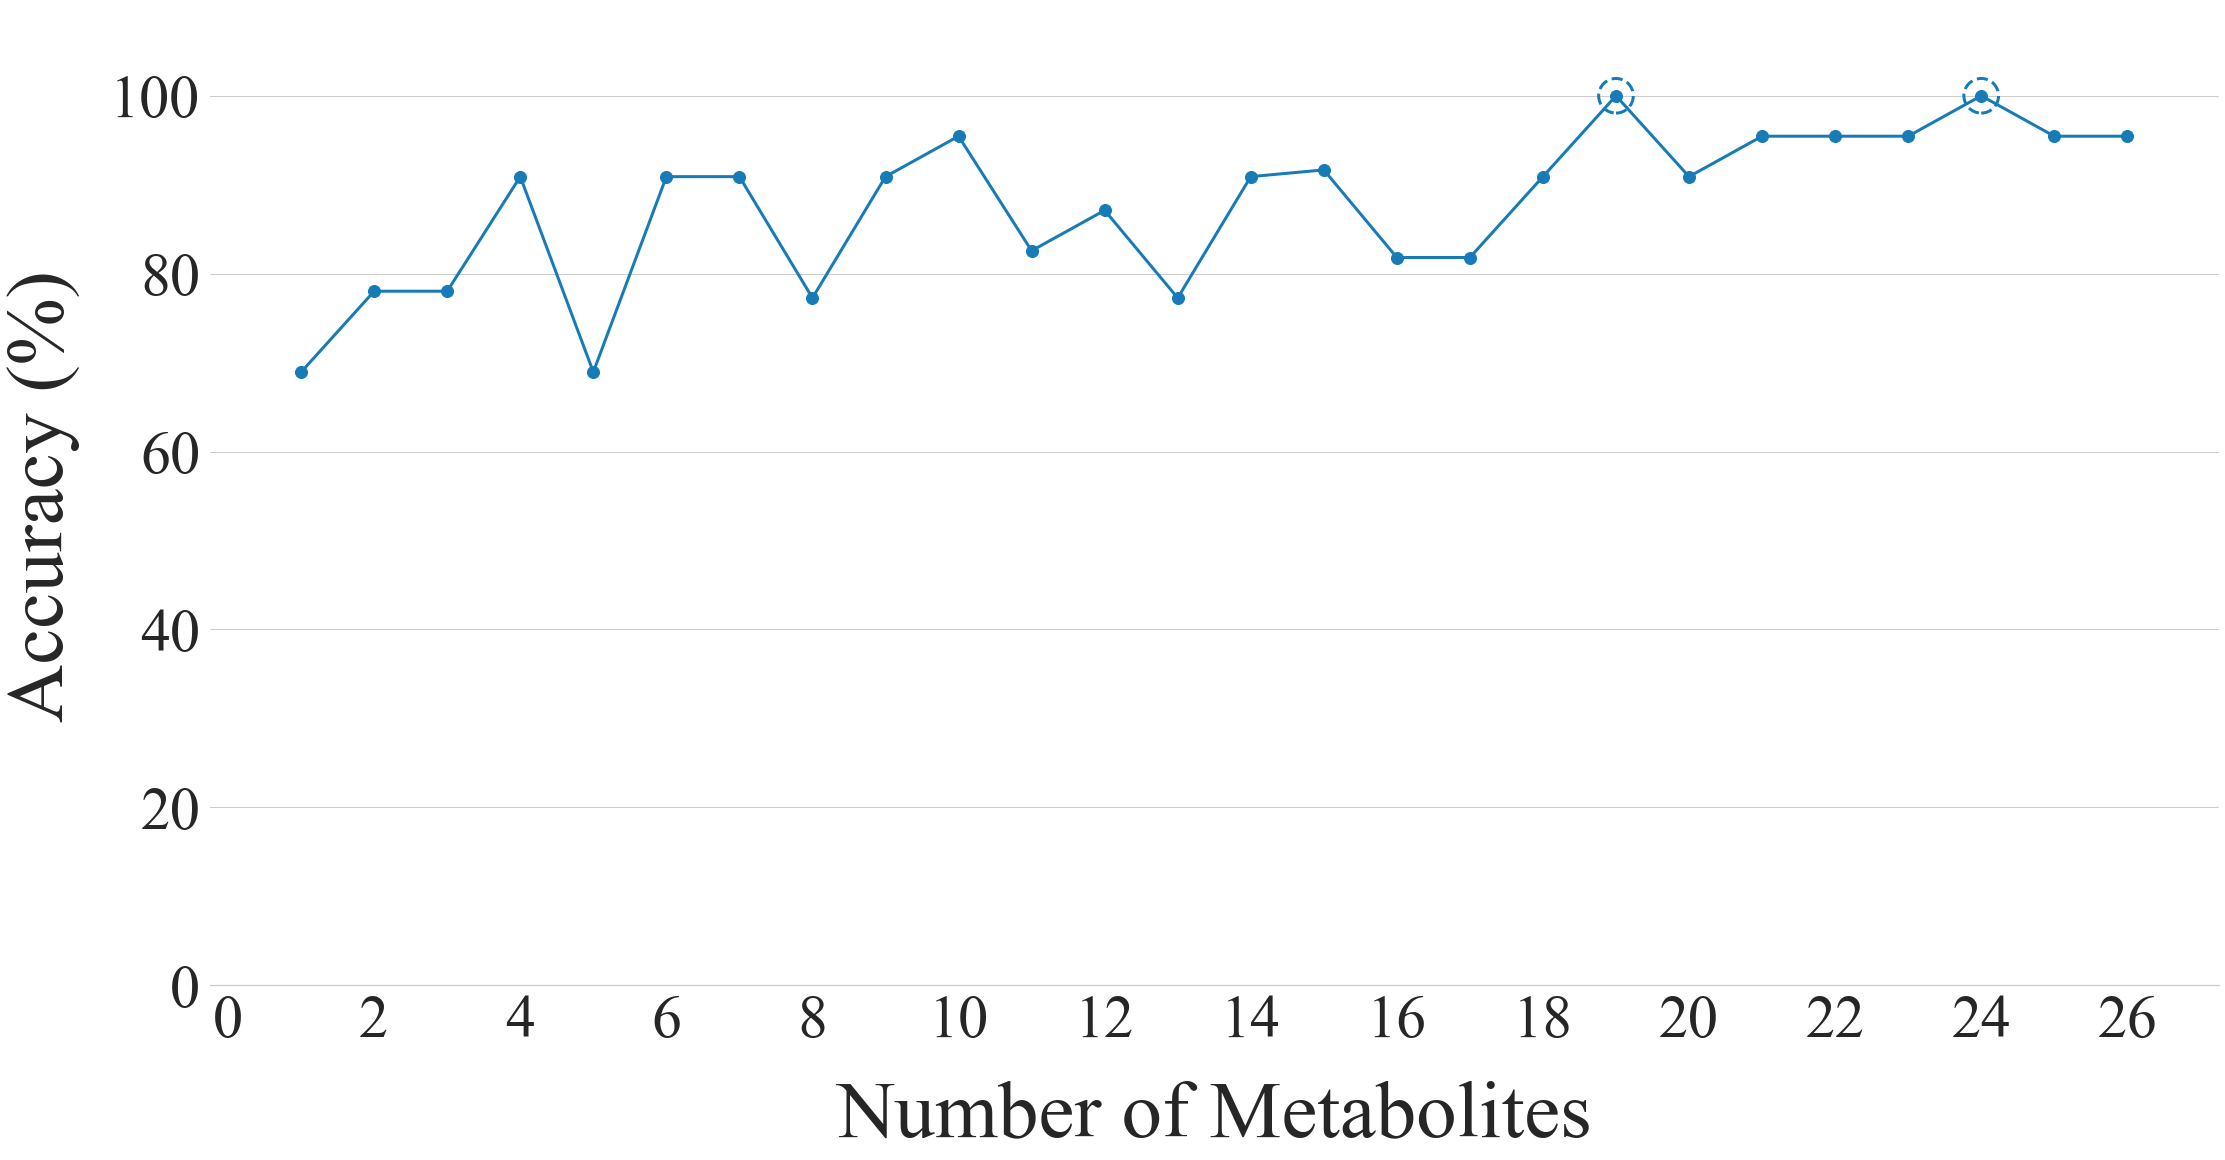

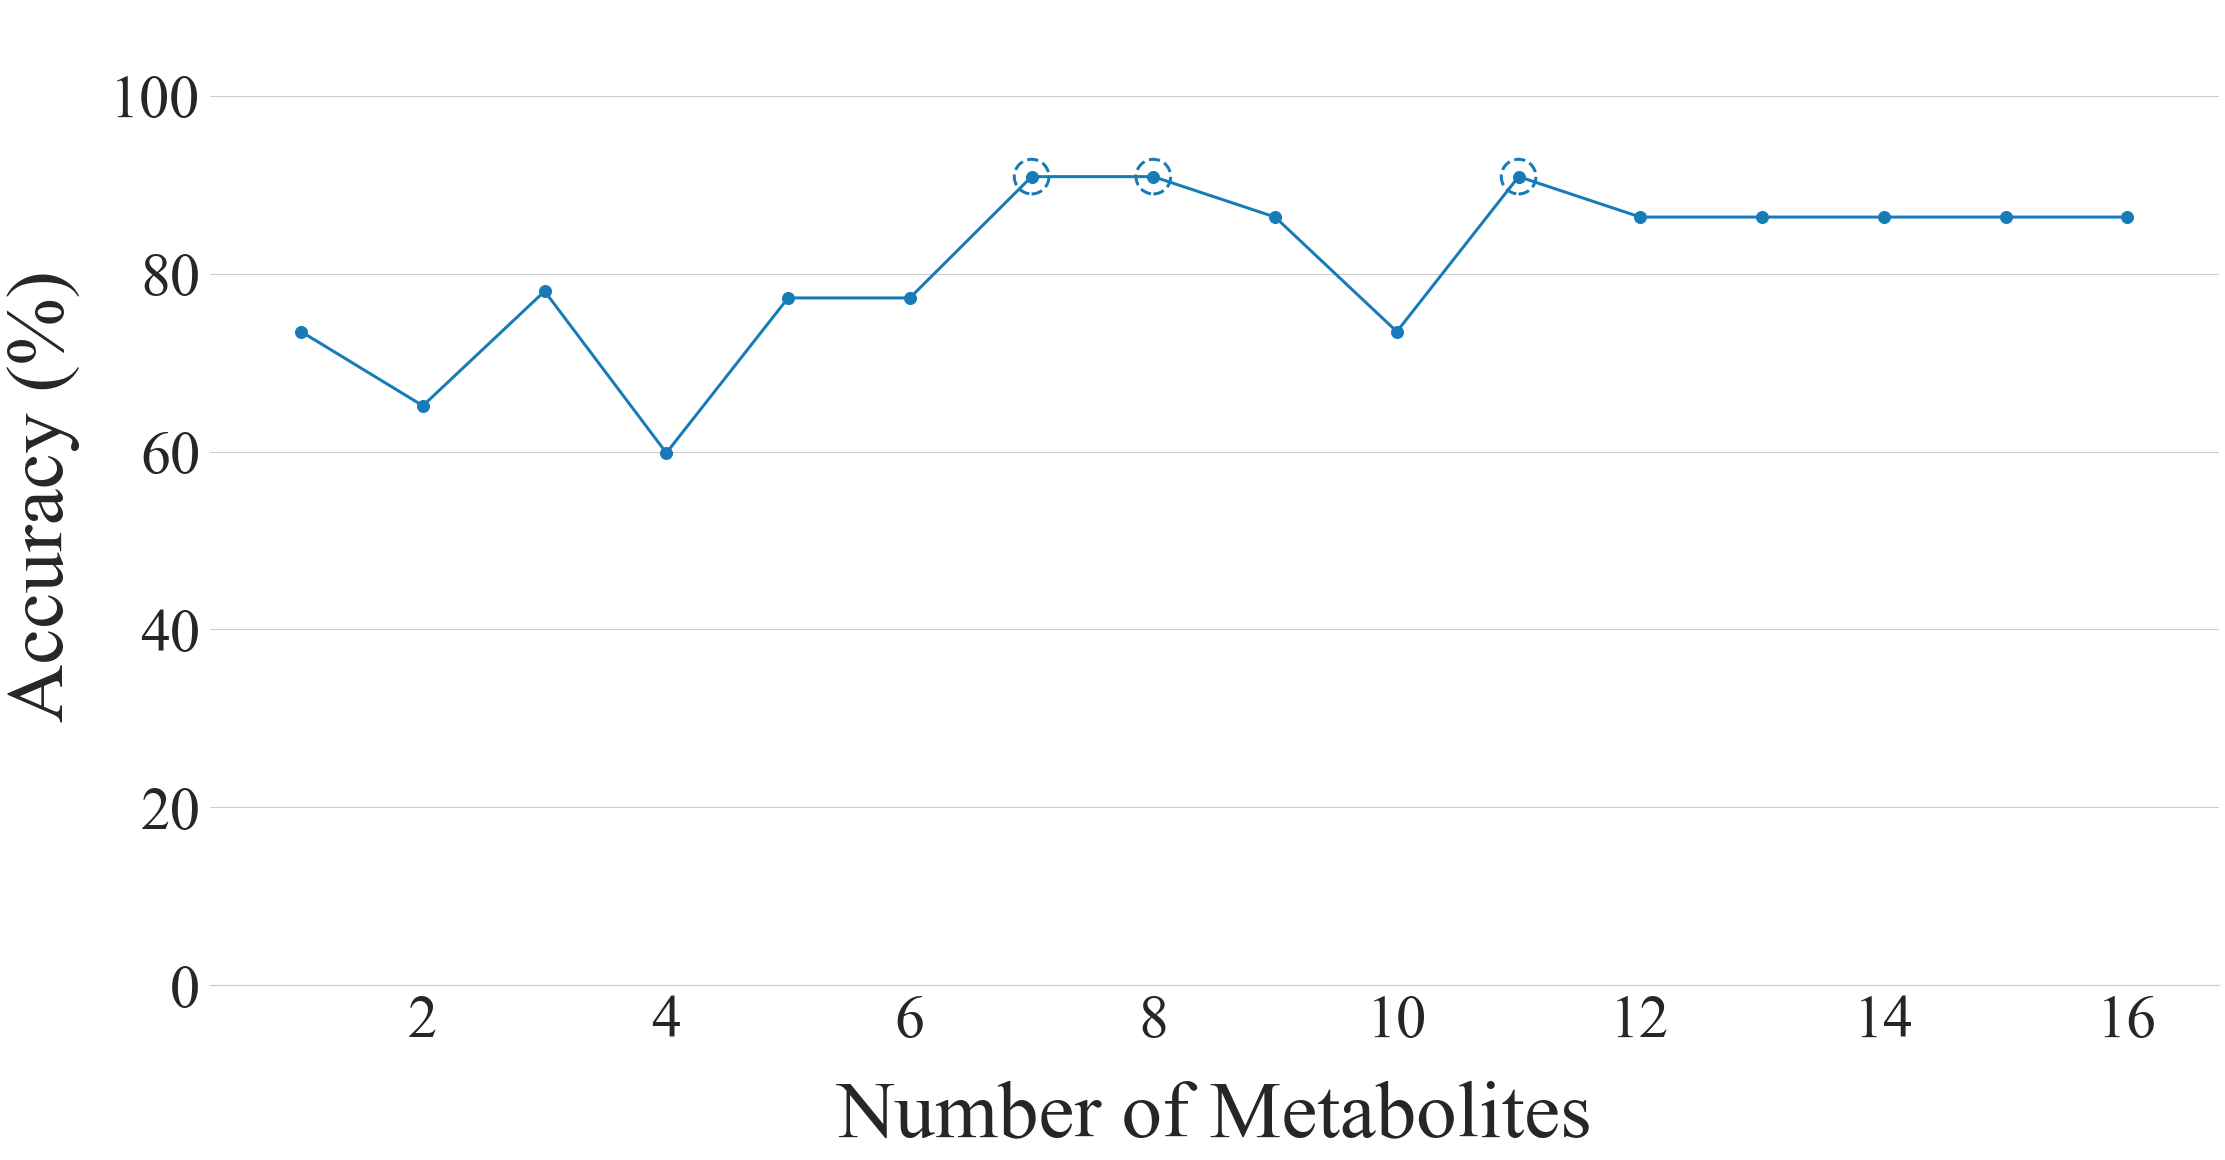

In [56]:
def plot_rfecv_acc(csv_path):
    factor = 3
    plt.figure(figsize=(12*factor, 6*factor))
    rfe_plasma_acc = pd.read_csv(csv_path)
    x = rfe_plasma_acc['Number of Metabolites']
    y = rfe_plasma_acc['Accuracy']*100
    best_x = [i+1 for i, j in enumerate(y) if j == max(y)]
    best_y = round(max(y), 2)

    plt.plot(x, y, 'o-', markersize=12, c='#167bb6', linewidth=factor)
    plt.xticks(range(0, max(x)+1, 2), rotation='horizontal', size=20*factor)
    plt.yticks(size=20*factor)
    plt.xlabel('Number of Metabolites', size=27*factor, labelpad=10*factor)
    plt.ylabel('Accuracy (%)', size=27*factor, labelpad=10*factor)
    plt.ylim([0, 110])
    plt.grid(axis='x')
    sns.despine(left=True)
    plt.scatter(best_x, [best_y]*len(best_x), s=1200, facecolors='none', linewidth=factor, edgecolors='#167bb6', linestyle='--')

    plt.savefig(f'rfe_{csv_path.split(" ")[0].split("/")[-1]}.jpg', bbox_inches='tight', pad_inches=0)
    plt.show()

plot_rfecv_acc('/content/Plasma Accuracy.csv')
plot_rfecv_acc('/content/Serum Accuracy.csv')

### `Performance Comparison`

In [ ]:
# factor = 2
# import seaborn as sns
# sns.set(style="whitegrid", font_scale=1.2*factor)
# sns.set_style({'font.family': 'Times New Roman'})

# both = [['Plasma', 87.50, 90.91, 87.12, 82.58, 90.91, 82.58, 90.91, 86.36, 42.42],
#         ['Serum', 83.33, 73.48, 90.91, 83.33, 91.67, 74.24, 74.24, 69.70, 69.70]]

# cols = ['Sample Type', 'Masrur et al. [9]', 'Approach 1', 'Approach 2 (Only Pearson)', 'Approach 2 (PCA-4)',
#         'Approach 2 (PCA-5)', 'Approach 2 (PCA-10)', 'Approach 2 (PCA-15)', 'Approach 2 (t-SNE-2)', 'Approach 2 (t-SNE-3)']
# both_df = pd.DataFrame(both, columns=cols)

# both_df.plot(x='Sample Type', y=cols[1:], kind="bar",
#              figsize=(21*factor, 8*factor), width=0.9, color=['#d0d1e6','#73a9cf', '#f16813', '#f77a27', '#fd8c3b', '#fd9d53', '#fdae6a', '#fdbf86', '#fdd0a2'], edgecolor='white')

# plt.xlabel('Sample Type', size=27*factor,  labelpad=10*factor)
# plt.xticks(rotation='horizontal', size=20*factor)
# plt.yticks(size=20*factor)
# plt.ylabel('Accuracy (%)', size=27*factor, labelpad=10*factor)
# plt.legend(loc='center right', bbox_to_anchor=(1.085, 0.5))
# plt.ylim([0, 100])
# plt.grid(axis='x')
# sns.despine(left=True)

# plt.savefig('performance_comparison.jpg', bbox_inches='tight', pad_inches=0)
# plt.show()